<a href="https://colab.research.google.com/github/Deepak-1440/machine_learning1/blob/main/SVM_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
x = np.linspace(-5.0,5.0,100)
# y = np.linspace(10**2 - x**2) # This line caused the error and is not needed
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x, -x])

In [7]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [8]:
y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [9]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

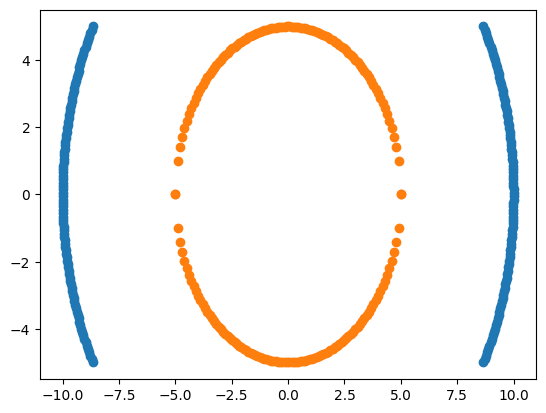

In [10]:
plt.scatter(y,x)
plt.scatter(x1,y1)

In [12]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns = ['x1' , 'x2'])
df1['y']=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ['x1','x2'])
df2['y']=1
df = pd.concat([df1, df2])
df.head()

,x1,x2,y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [13]:
df.tail()

,x1,x2,y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [15]:
x = df.iloc[:,:2]
y = df.y
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)



In [23]:
df['x1_square'] = df['x1']**2
df['x2_square'] = df['x2']**2
df['x1*x2'] = (df['x1']*df['x2'])
df.head()

,x1,x2,y,x1_square,x2_square,x1*x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [24]:
x = df[['x1', 'x2', 'x1_square', 'x2_square', 'x1*x2']]
y = df['y']

In [25]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
x_train

,x1,x2,x1_square,x2_square,x1*x2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [27]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1', y='x2',z='x1*x2',color='y')
fig.show()

In [30]:
fig = px.scatter_3d(df, x='x1_square', y='x2_square',z='x1*x2',color='y')
fig.show()

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='poly')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='rbf')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='sigmoid')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

1.0